In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SKAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SKAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
with open('Downloads/titles.txt', 'r') as filehandle:
    titles = json.load(filehandle)
    
with open('Downloads/synopses.txt', 'r') as filehandle:
    synopses = json.load(filehandle)


In [5]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [6]:
stemmer = SnowballStemmer("english")

In [7]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens






In [8]:
myTokenizer(synopses[0])

['in',
 'late',
 'summer',
 'guest',
 'are',
 'gather',
 'for',
 'the',
 'wed',
 'recept',
 'of',
 'don',
 'vito',
 'corleon',
 "'s",
 'daughter',
 'conni',
 'talia',
 'shire',
 'and',
 'carlo',
 'rizzi',
 'gianni',
 'russo',
 'vito',
 'marlon',
 'brando',
 'the',
 'head',
 'of',
 'the',
 'corleon',
 'mafia',
 'famili',
 'is',
 'known',
 'to',
 'friend',
 'and',
 'associ',
 'as',
 'godfath',
 'he',
 'and',
 'tom',
 'hagen',
 'robert',
 'duval',
 'the',
 'corleon',
 'famili',
 'lawyer',
 'are',
 'hear',
 'request',
 'for',
 'favor',
 'becaus',
 'accord',
 'to',
 'italian',
 'tradit',
 'no',
 'sicilian',
 'can',
 'refus',
 'a',
 'request',
 'on',
 'his',
 'daughter',
 "'s",
 'wed',
 'day',
 'one',
 'of',
 'the',
 'men',
 'who',
 'ask',
 'the',
 'don',
 'for',
 'a',
 'favor',
 'is',
 'amerigo',
 'bonasera',
 'a',
 'success',
 'mortician',
 'and',
 'acquaint',
 'of',
 'the',
 'don',
 'whose',
 'daughter',
 'was',
 'brutal',
 'beaten',
 'by',
 'two',
 'young',
 'men',
 'becaus',
 'she',
 'r

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.05, stop_words=stopwords,
                                 use_idf=True, tokenizer=myTokenizer, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)
terms = tfidf_vectorizer.get_feature_names_out()


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)


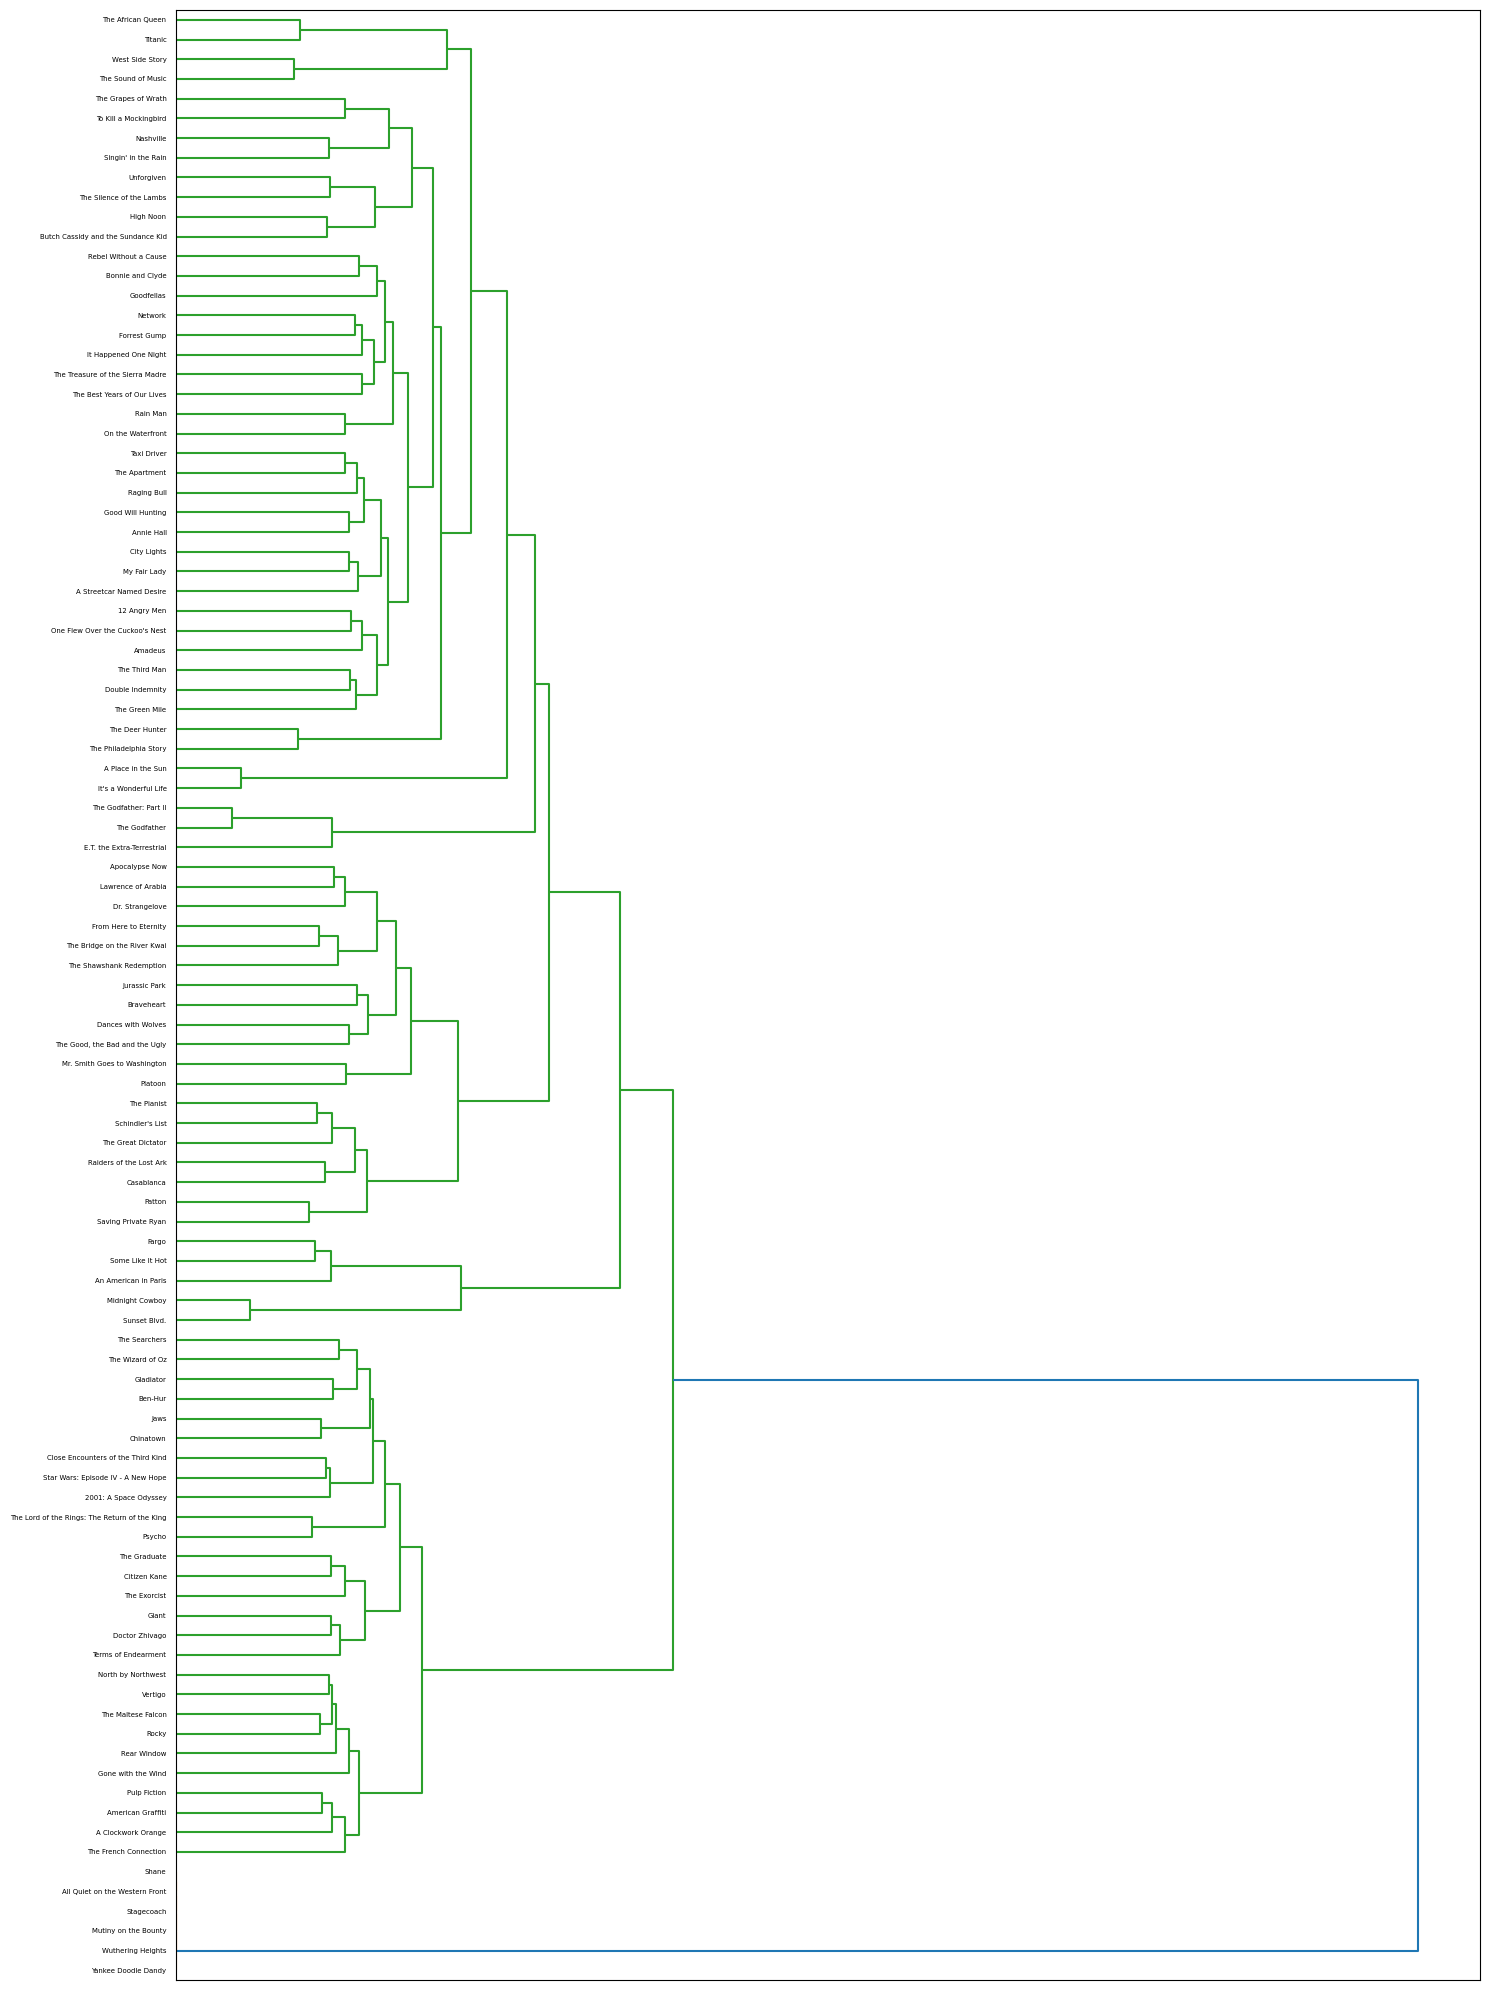

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [13]:
titles[89]

'Mutiny on the Bounty'

In [14]:
synopses[89]

'\n\nIt looks like we don\'t have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.\n\n'